# Herramienta para el Análisis de Datos de una cuenta de Instagram
Bienvenido a la herramienta para obtener las métricas de cuentas de Instagram de negocios. En esta plataforma, podrás ejecutar el código que se conecta con Instagram directamente, que estará acompañado con una guía que llevará de la mano a quien utilice la herramienta para obtener las métricas deseadas.

## ¿Qué necesito para utilizar la herramienta?
1. Una cuenta de Instagram de Empresa (es decir, con analíticas activadas)
2. Acceso a la cuenta de Facebook que está asociado al Instagram del que quieres obtener las analíticas.

## ¿Qué debo hacer para utilizar la herramienta?
1. Crear una aplicación de desarrollador en la [Página de Desarrolladores de Facebook](https://developers.facebook.com).
### Si no te has registrado en la página de desarrolladores de Facebook, sigue estos pasos
    1. Haz click en Empezar 
![](fotosHerramientaInstagram/paso0-iniciarRegistro.png)
    2. Verifica que la información en pantalla es la de la cuenta de Facebook asociada al instagram del que quieres obtener las métricas. Luego, haz click en Siguiente.
    ![](fotosHerramientaInstagram/paso1-aceptarFB.png)
    3. Rellena cómo usarás la plataforma. En nuestro caso "Anunciante o Especialista de Marketing"
    ![](fotosHerramientaInstagram/paso2-informacionSobreUso.png)
    4. Continúa el proceso. Haz click en Crear Primera App
    ![](fotosHerramientaInstagram/paso3-crearApp.png)
    5. Rellena la información del formulario y haz click en Crear Identificador de la App.
    ![](fotosHerramientaInstagram/paso4-informacionApp.png)
3. Abre la página para las [Herramientas del API de Grafo de Facebook](https://developers.facebook.com/tools/explorer)
4. Selecciona Obtener Token de Acceso de Usuario siguiendo los pasos de la foto.
![](fotosHerramientaInstagram/paso5-comienzoTokenDeAcceso.png)
5. Confirma el acceso de Facebook 
![](fotosHerramientaInstagram/paso6-confirmarAcceso.png)
6. Agrega los siguientes permisos para que la herramienta pueda utilizar acceder a la información de la cuenta de Instagram:  
    - instagram_basic
    - instagram_manage_comments
    - instagram_manage_insights
    - pages_read_engagement
    - pages_show_list
7. Genera el código (válido por 1 hora) haciendo click en Generate Access Token y acepta los permisos de Facebook.
![](fotosHerramientaInstagram/paso7-generarCodigoDeAcceso.png)
8. Copia el token de acceso y llene el siguiente campo con el código entre comillas. Habrán numerales que indicarán instrucciones dentro del código. Después, presiona SHIFT+Enter en la casilla.


In [23]:
# CÓDIGO DE ACCESO DE 1 HORA
one_hour_access_token = "access_token"
# EJECUTAR CON SHIFT+Enter

8. Accede a la aplicación que creaste a través de https://developers.facebook.com/apps/
![](fotosHerramientaInstagram/paso8-accederALaApp.png)
9. Copia el ID de Cliente y la Llave secreta del cliente, que podrás obtener al hacer click en Configuración Básica de la aplicación que generaste en https://developers.facebook.com/apps/
![](fotosHerramientaInstagram/paso9-copiarIdYClave.png)
10. Llena los siguientes campos con los valores copiados del cliente

In [24]:
# ID DE CLIENTE
client_id = "id_de_cliente"
# LLAVE SECRETA DEL CLIENTE
client_secret_key = "clave_secreta_cliente"
# EJECUTAR CON SHIFT+Enter

In [3]:
# NO EDITAR, SOLO EJECUTAR CON SHIFT+Enter
import json
from datetime import datetime
import pandas as pd
import dateutil.parser as dt
from instagram_graph_api import debugAccessToken, getCreds, getInstagramBusinessAccounts, getLongLivedAccessToken, getMediaInsights, getUserInsights, getUserMedia, getUserPages
from unofficial_instagram_api import get_info_from_api as get_info_from_unofficial_api, date_validator
from instagram_internal_tool_library import display_post_info, get_hashtags, merge_apis_data

9. Prueba la conexión ejecutando la siguiente celda

In [4]:
params = getCreds(one_hour_access_token, client_id, client_secret_key)
params['debug'] = False # set debug

res_data = debugAccessToken(params)['json_data']

if('error' in res_data.keys()):
    print('Hubo un error, revisa el código de acceso')
else:
    print('Prueba exitosa, continúa con el proceso')

Prueba exitosa, continúa con el proceso


10. Si la prueba anterior no funcionó, deberás revisar los pasos uno a uno a partir del paso 6.
11. Ejecuta la siguiente casilla para obtener un código de acceso por 60 días que reemplazará el de 1 hora.

In [5]:
# NO EDITAR, SOLO EJECUTAR CON SHIFT+Enter
response = getLongLivedAccessToken( params )
params['access_token'] = response['json_data']['access_token']

12. Ingresa el nombre de la página de Facebook asociada con la cuenta de Instagram

In [27]:
# INGRESA EL NOMBRE DE LA PÁGINA DE FACEBOOK
page_name = 'nombre_pagina'

# NO EDITAR, SOLO EJECUTAR CON SHIFT+Enter
response = getUserPages(params)
found_page = False
page_id = None
for page in response['json_data']['data']:
    if page['name'].lower().replace(" ","") == page_name.lower().replace(" ",""):
        page_id = page['id']
        found_page = True

params['page_id'] = page_id

# Nombres mas claros
if found_page == False:
    found_pages = list(map(lambda page: page['name'],response['json_data']['data']))
    print('No se consiguió ninguna página con ese nombre. Le presentamos las páginas conseguidas')
    print(found_pages)
    print('Corrija por el nombre correcto. Si no ve la página que busca, contacte con el programador: Rafael Quintero')
else:
    print('Puede continuar con el siguiente paso de la herramienta')

Puede continuar con el siguiente paso de la herramienta


In [7]:
# INGRESA EL NOMBRE DEL USUARIO DE INSTAGRAM
instagram_user = 'usuario_instagram'

13. Si después de terminar el paso 12, no hubo ningún error, introduzca el mes y el año del que se quieren obtener las métricas. Ejecuta las casillas de código

In [28]:
# Mes de Inicio (sin comillas)
start_month = 7
# Año de Inicio (sin comillas)
start_year = 2020

14. Si no quieres que las métricas lleguen hasta el día de hoy, especifica el año y mes de finalización de métricas. Al no hacerlo, se mostrarán las métricas de los post publicados desde el año y mes de inicio especificado hasta el día de hoy.

In [29]:
# Mes de Fin (sin comillas) 
end_month = datetime.now().month
# Año de Fin (sin comillas)
end_year = datetime.now().year
# NO EDITAR, SOLO EJECUTAR CON SHIFT+Enter
params['instagram_account_id'] = getInstagramBusinessAccounts( params )['json_data']['instagram_business_account']['id']

In [30]:
# NO EDITAR, SOLO EJECUTAR CON SHIFT+Enter
user_insights_unformatted = getUserInsights( params )['json_data']['data']
user_insights = dict()
for user_insight in user_insights_unformatted:
    user_insights[user_insight['name']] = user_insight['values'][0]['value']

In [31]:
# NO EDITAR, SOLO EJECUTAR CON SHIFT+Enter
basic_media_metrics = 'engagement,impressions,reach,saved'
params['metric'] = basic_media_metrics
# We fetch until we get all the media items needed
user_media_next_page = ''
fetched_all_media_items = False
fetched_media_items_count = 0
post_insights = list()
post_metrics_keys = []
hashtag_metrics = []
while not fetched_all_media_items:
    user_media_response = getUserMedia(params, user_media_next_page)['json_data']
    media_items = user_media_response['data']
    fetched_media_items_count += len(media_items)
    user_media_next_page = user_media_response['paging']['next']
    for index, item in enumerate(media_items, start=1):
        # We restart the params for the query
        params['metric'] = basic_media_metrics
        params['ig_media_id'] = item['id']
        # We parse the date
        date = dt.parse(item['timestamp'])
        # If the date's not valid, then we check if we at least got one before stopping
        if not date_validator(date.month, date.year, start_year, start_month, end_year, end_month):
            # If at least one item got discovered, we fetched all items
            if date.year < start_year or date.year == start_year and date.month < start_month:
                fetched_all_media_items = True
                break
            else:
                fetched_all_media_items = len(post_insights) > 1 
        # If the date is valid, we proceed normally
        elif date_validator(date.month, date.year, start_year, start_month, end_year, end_month):
            # We just add the items that meet the year and month established. We add their specific metrics
            if(item['media_type']) == 'CAROUSEL_ALBUM':
                params['metric'] += ',carousel_album_engagement,carousel_album_impressions,carousel_album_reach,carousel_album_saved,carousel_album_video_views'
            if(item['media_type']) == 'VIDEO':
                params['metric'] += ',video_views'
            insights = getMediaInsights(params)['json_data']['data']
            # We add the metrics for the item
            for insight in insights:
                if insight['name'] not in post_metrics_keys:
                    post_metrics_keys.append(insight['name'])
                item[insight['name']] = insight['values'][0]['value']
            # Getting the hashtags metrics
            post_hashtags = get_hashtags(item['caption'])
            for hashtag in post_hashtags:
                # We check if the hashtag exists
                old_existing_hashtag = next(filter(lambda ht: ht['id'] == hashtag, hashtag_metrics), None)
                if(old_existing_hashtag is not None):
                    # We get its index
                    hashtag_index = hashtag_metrics.index(old_existing_hashtag)
                    # We update the values in a copy
                    updated_existing_hashtag = old_existing_hashtag.copy()
                    updated_existing_hashtag['engagement'] = old_existing_hashtag['engagement'] + item['engagement']
                    updated_existing_hashtag['reach'] = old_existing_hashtag['reach'] + item['reach']
                    updated_existing_hashtag['count'] = old_existing_hashtag['count'] + 1
                    # We update the list item
                    hashtag_metrics[hashtag_index] = updated_existing_hashtag
                else:
                    # If the hashtag doesn't exist, we create it and append it
                    new_hashtag_metric = dict()
                    new_hashtag_metric['id'] = hashtag
                    new_hashtag_metric['reach'] = item['reach']
                    new_hashtag_metric['engagement'] = item['engagement']
                    new_hashtag_metric['count'] = 1
                    hashtag_metrics.append(new_hashtag_metric)
            # Adding the item to the list
            post_insights.append(item)

In [32]:
# NO EDITAR, SOLO EJECUTAR CON SHIFT+Enter
unofficial_api_response = get_info_from_unofficial_api(instagram_user,fetched_media_items_count,start_year, start_month, end_year, end_month)
unofficial_posts = unofficial_api_response['medias']
unofficial_account = unofficial_api_response['account']

In [33]:
# NO EDITAR, SOLO EJECUTAR CON SHIFT+Enter
posts_info = merge_apis_data(post_insights, unofficial_posts)

In [34]:
# NO EDITAR, SOLO EJECUTAR CON SHIFT+Enter
# Posts DataFrame Keys
post_df = pd.DataFrame()
post_basic_info_keys = ['caption','media_type','media_url','permalink','thumbnail_url','timestamp', 'likes', 'comments']
post_df_keys = post_basic_info_keys + post_metrics_keys
for key in post_df_keys:
    post_df[key] = pd.Series(list(map(lambda post: post[key] if key in post.keys() else 0, posts_info)))
# Hashtags DataFrame
hashtag_df = pd.DataFrame()
hashtag_df_keys = ['id', 'count']
hashtag_df_avg_keys = ['reach','engagement']
for key in hashtag_df_keys:
    hashtag_df[key] = pd.Series(list(map(lambda hashtag: hashtag[key] if key in hashtag.keys() else 0, hashtag_metrics)))
for key in hashtag_df_avg_keys:
    hashtag_df[f"avg_{key}"] = pd.Series(list(map(lambda hashtag: hashtag[key]/hashtag['count'] if key in hashtag.keys() else 0, hashtag_metrics)))
# Relevant Info DataFrame
relevant_info_df = pd.DataFrame()
desired_data_keys = ['comments', 'likes', 'saved', 'engagement', 'impressions', 'reach']
for key in desired_data_keys:
    relevant_info_df[f"total_{key}"] = pd.Series([post_df[key].sum()])
    relevant_info_df[f"avg_{key}"] = pd.Series([post_df[key].mean()])

14. Ejecuta para ver los mejores 5 posts

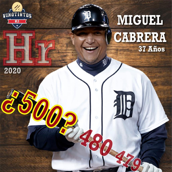

Likes: 817.
Comments: 53.
Video Views: 0.
Engagement: 883.
Impressions: 15600.
Reach: 14706.
Caption: ⚾🇻🇪🇺🇸JONRONES 479 Y 480 DE MIGUEL CABRERA🇺🇸🇻🇪⚾

#CABRERA saco ayer 2 jonrones, lo que lo acerca...
Date: 31/7/2020


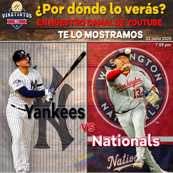

Likes: 702.
Comments: 27.
Video Views: 0.
Engagement: 765.
Impressions: 15897.
Reach: 14742.
Caption: ⚾🇻🇪🇺🇸Y COMIENZA LA FIESTA DEL BEISBOL🇺🇸🇻🇪⚾

Si no sabes por dónde ver las #GrandesLigas 2020, e...
Date: 23/7/2020


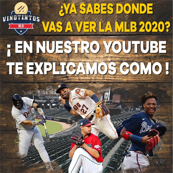

Likes: 545.
Comments: 57.
Video Views: 0.
Engagement: 714.
Impressions: 14640.
Reach: 13255.
Caption: ⚾🇺🇸🇻🇪¿YA SABES DONDE VAS A VER LOS JUEGOS DE LAS GRANDES LIGAS 2020?🇻🇪🇺🇸⚾

El 23 de Julio comie...
Date: 16/7/2020


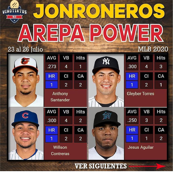

Likes: 630.
Comments: 31.
Video Views: 20760.
Engagement: 675.
Impressions: 23156.
Reach: 20760.
Caption: ⚾🇻🇪🇻🇪🇺🇸Y CONTINUAN LOS AREPA POWERS🇺🇸🇻🇪🇻🇪⚾

Aqui les dejamos a los #Venezolanos que la sacaron ...
Date: 27/7/2020


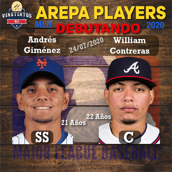

Likes: 609.
Comments: 14.
Video Views: 0.
Engagement: 633.
Impressions: 11234.
Reach: 10722.
Caption: ⚾🇺🇸🇻🇪🇻🇪DOS NUEVOS AREPA PLAYERS EN LA MLB🇻🇪🇻🇪🇺🇸⚾

En el juego de hoy  en la tarde del 24 de Jul...
Date: 25/7/2020


In [35]:
# NO EDITAR, SOLO EJECUTAR CON SHIFT+Enter
for row in post_df.sort_values(by=['engagement'], ascending=False).head(5).iterrows():
    display_post_info(row)

15. Ejecuta para ver los peores 5 posts según Engagement: Likes + Comments + Saves

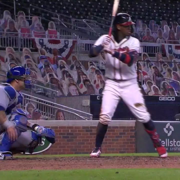

Likes: 101.
Comments: 1.
Video Views: 1328.
Engagement: 106.
Impressions: 2415.
Reach: 2304.
Caption: ⚾🇻🇪🇺🇸DONDE PUEDO CONSEGUIR LAS ESTADISTICAS DE MIS JUGADORES FAVORITOS🇺🇸🇻🇪⚾

Cada mañana al des...
Date: 3/8/2020


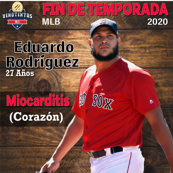

Likes: 207.
Comments: 11.
Video Views: 0.
Engagement: 221.
Impressions: 5721.
Reach: 5618.
Caption: ⚾🇻🇪🇺🇸😔RODRÍGUEZ CON PROBLEMAS DEL CORAZÓN - FIN DE TEMPORADA 2020 - 😔🇺🇸🇻🇪⚾

#EduardoRodríguez e...
Date: 2/8/2020


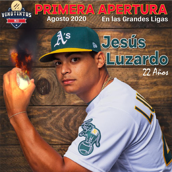

Likes: 281.
Comments: 11.
Video Views: 0.
Engagement: 294.
Impressions: 4358.
Reach: 4120.
Caption: ⚾🇻🇪🇺🇸SE ESTRENA LUZARDO COMO ABRIDOR 🇺🇸🇻🇪⚾

Hoy Martes 04 de Agosto de 2020 hace su primera apa...
Date: 4/8/2020


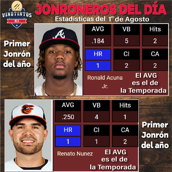

Likes: 414.
Comments: 12.
Video Views: 0.
Engagement: 429.
Impressions: 10487.
Reach: 10227.
Caption: ⚾🇻🇪🇺🇸JONRONEROS DEL 1RO DE AGOSTO DE 2020 - - AREPA POWER-- 🇺🇸🇻🇪⚾

#RonaldAcuñaJr y #RenaroÑune...
Date: 2/8/2020


In [16]:
# NO EDITAR, SOLO EJECUTAR CON SHIFT+Enter
for row in post_df.sort_values(by=['engagement'], ascending=True).head(5).iterrows():
    display_post_info(row)

15. Indica el nombre del archivo de Excel que quieres para las métricas

In [38]:
# NO EDITAR, SOLO EJECUTAR CON SHIFT+Enter
date = f"{datetime.now().day}-{datetime.now().month}-{datetime.now().year}"
file_name = f'metricas_{instagram_user}_{date}'
with pd.ExcelWriter(f"{file_name}.xlsx") as writer:
    post_df.to_excel(writer, sheet_name='Posts')
    hashtag_df.to_excel(writer, sheet_name='Hashtags')
    relevant_info_df.to_excel(writer, sheet_name='Relevant Info')

## Posibles preguntas sobre la Herramienta

### ¿Qué hago si mi cuenta de Instagram no tiene un Facebook asociado?
Si tu cuenta de Instagram no está enlazada con una cuenta de Facebook, deberás seguir los siguientes pasos para vincularla.
![](fotosHerramientaInstagram/vincularFB.png)
### ¿Qué hago si mi cuenta de Instagram tiene un Facebook que no quiero que esté asociado?
Si tu cuenta de Instagram no está enlazada con la cuenta de Facebook que quieres, deberás seguir los siguientes pasos para desvincularlas.
![](fotosHerramientaInstagram/desvincularFB.png)